# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [133]:
X_temp = pd.read_csv('./input/X_train.csv').drop('Unnamed: 0', axis=1)
X_test = pd.read_csv('./input/X_test.csv').drop('Unnamed: 0', axis=1)
y_temp = pd.read_csv('./input/y_train.txt', header=None)
y_test  = pd.read_csv('./input/y_test.txt', header=None)

### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [134]:
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=.25, random_state=27)

### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [135]:
clf = DecisionTreeClassifier(max_depth=4, random_state=27).fit(X_train, y_train)

In [136]:
melhores_3_vals = [_ for _ in
     pd.DataFrame({'variavel':X_train.columns,
                   'importancia':clf.feature_importances_}
                 )
                 .sort_values('importancia',
                              ascending=False
                             )
                             .head(3).variavel
    ]
melhores_3_vals

['tGravityAcc-min()-X', 'fBodyAcc-mad()-X', 'tGravityAcc-mean()-Y']

### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [137]:
path = DecisionTreeClassifier(random_state=27).cost_complexity_pruning_path(X_train[melhores_3_vals], y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [138]:
%%time
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=27, ccp_alpha=ccp_alpha).fit(X_train[melhores_3_vals], y_train)
    clfs.append(clf)

CPU times: total: 12.7 s
Wall time: 15 s


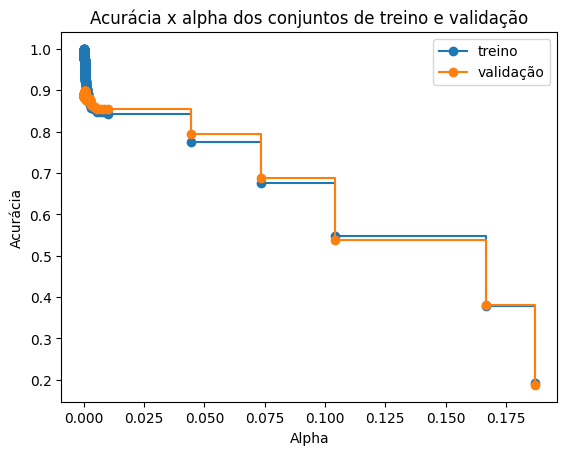

In [139]:
train_scores = [clf.score(X_train[melhores_3_vals], y_train) for clf in clfs]
val_scores = [clf.score(X_val[melhores_3_vals], y_val) for clf in clfs]

fig, ax = plt.subplots()

ax.set_xlabel('Alpha')
ax.set_ylabel('Acurácia')
ax.set_title('Acurácia x alpha dos conjuntos de treino e validação')

ax.plot(ccp_alphas, train_scores, marker='o', label='treino', drawstyle='steps-post')
ax.plot(ccp_alphas, val_scores, marker='o', label='validação', drawstyle='steps-post')

ax.legend()
plt.show()

In [140]:
i_melhor_arvore = len(val_scores) - val_scores[::-1].index(max(val_scores)) - 1
melhor_arvore = clfs[i_melhor_arvore]

print(f'Acurácia da melhor arvore na base de validação: {val_scores[i_melhor_arvore]*100:.2f}%')

print(melhor_arvore)

Acurácia da melhor arvore na base de validação: 89.83%


DecisionTreeClassifier(ccp_alpha=0.00039380278770920793, random_state=27)

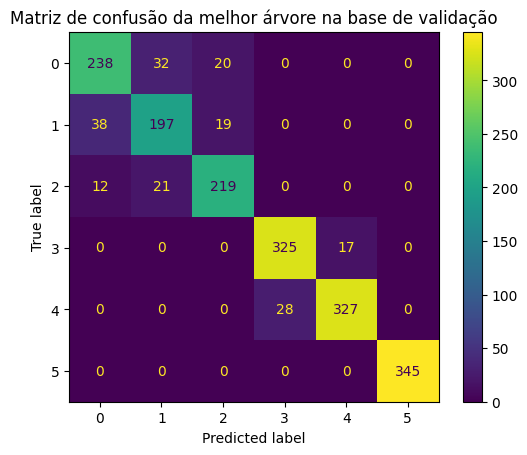

In [141]:
y_val_pred = melhor_arvore.predict(X_val[melhores_3_vals])
cm_val = confusion_matrix(y_val, y_val_pred)

ConfusionMatrixDisplay(confusion_matrix=cm_val).plot()

plt.title('Matriz de confusão da melhor árvore na base de validação')
plt.show()

### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

In [145]:
acc_test = melhor_arvore.score(X_test[melhores_3_vals], y_test)

print(f'Acurácia na base de teste: {acc_test*100:.2f}%')

print(melhor_arvore)

Acurácia na base de teste: 72.07%


DecisionTreeClassifier(ccp_alpha=0.00039380278770920793, random_state=27)

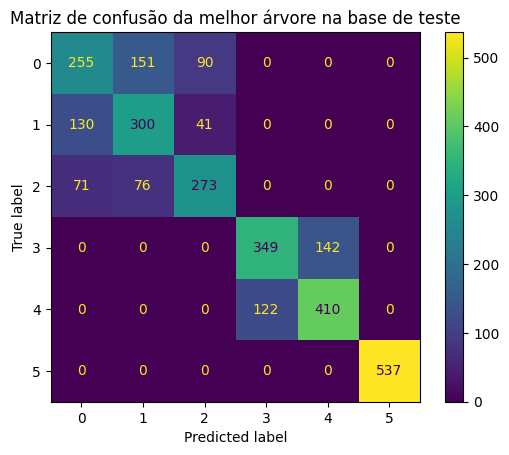

In [143]:
y_pred = melhor_arvore.predict(X_test[melhores_3_vals])
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

plt.title('Matriz de confusão da melhor árvore na base de teste')
plt.show()